In [1]:
from coactivation.process import preprocess_emgs, get_coactivation_map, get_coactivation_difference, get_all_healthy_map, get_coactivation_bool_map, get_alignment_map, emgs
from coactivation.visualize import visualize_emgs, plot_coactivation_corr, plot_coactivation_map, plot_bool_map, plot_alignment_map

import pandas as pd
import numpy as np


In [2]:
healthycm = get_all_healthy_map()

collected_data
collected_data/2023_10_16_fa

In subdirectory: collected_data/2023_10_16_fa
Files:
collected_data/2022_09_19

In subdirectory: collected_data/2022_09_19
collected_data/2023_10_23_xw

In subdirectory: collected_data/2023_10_23_xw
Files:
xw_111_rotation_integral.csv
xw_111.csv
collected_data/2023_10_23_xw/xw_111.csv
xw_112.csv
collected_data/2023_10_23_xw/xw_112.csv
xw_111_rotation_non_integral.csv
xw_111_translation_non_integral.csv
xw_111_rotation_integral_test.csv
xw_131.csv
collected_data/2023_10_23_xw/xw_131.csv
xw_111_rotation_integral_train.csv
xw_132.csv
collected_data/2023_10_23_xw/xw_132.csv
collected_data/2022_11_14

In subdirectory: collected_data/2022_11_14
collected_data/2023_10_25_ae

In subdirectory: collected_data/2023_10_25_ae
Files:
ae_131.csv
collected_data/2023_10_25_ae/ae_131.csv
ae_111_translation_non_integral.csv
ae_111_rotation_integral.csv
ae_132.csv
collected_data/2023_10_25_ae/ae_132.csv
ae_111_rotation_non_integral.csv
ae_111_rotation_integral_

In [3]:
path = 'collected_data/2023_11_02_im/im_111.csv'

In [4]:
df = preprocess_emgs(path)
cm = get_coactivation_map(df)

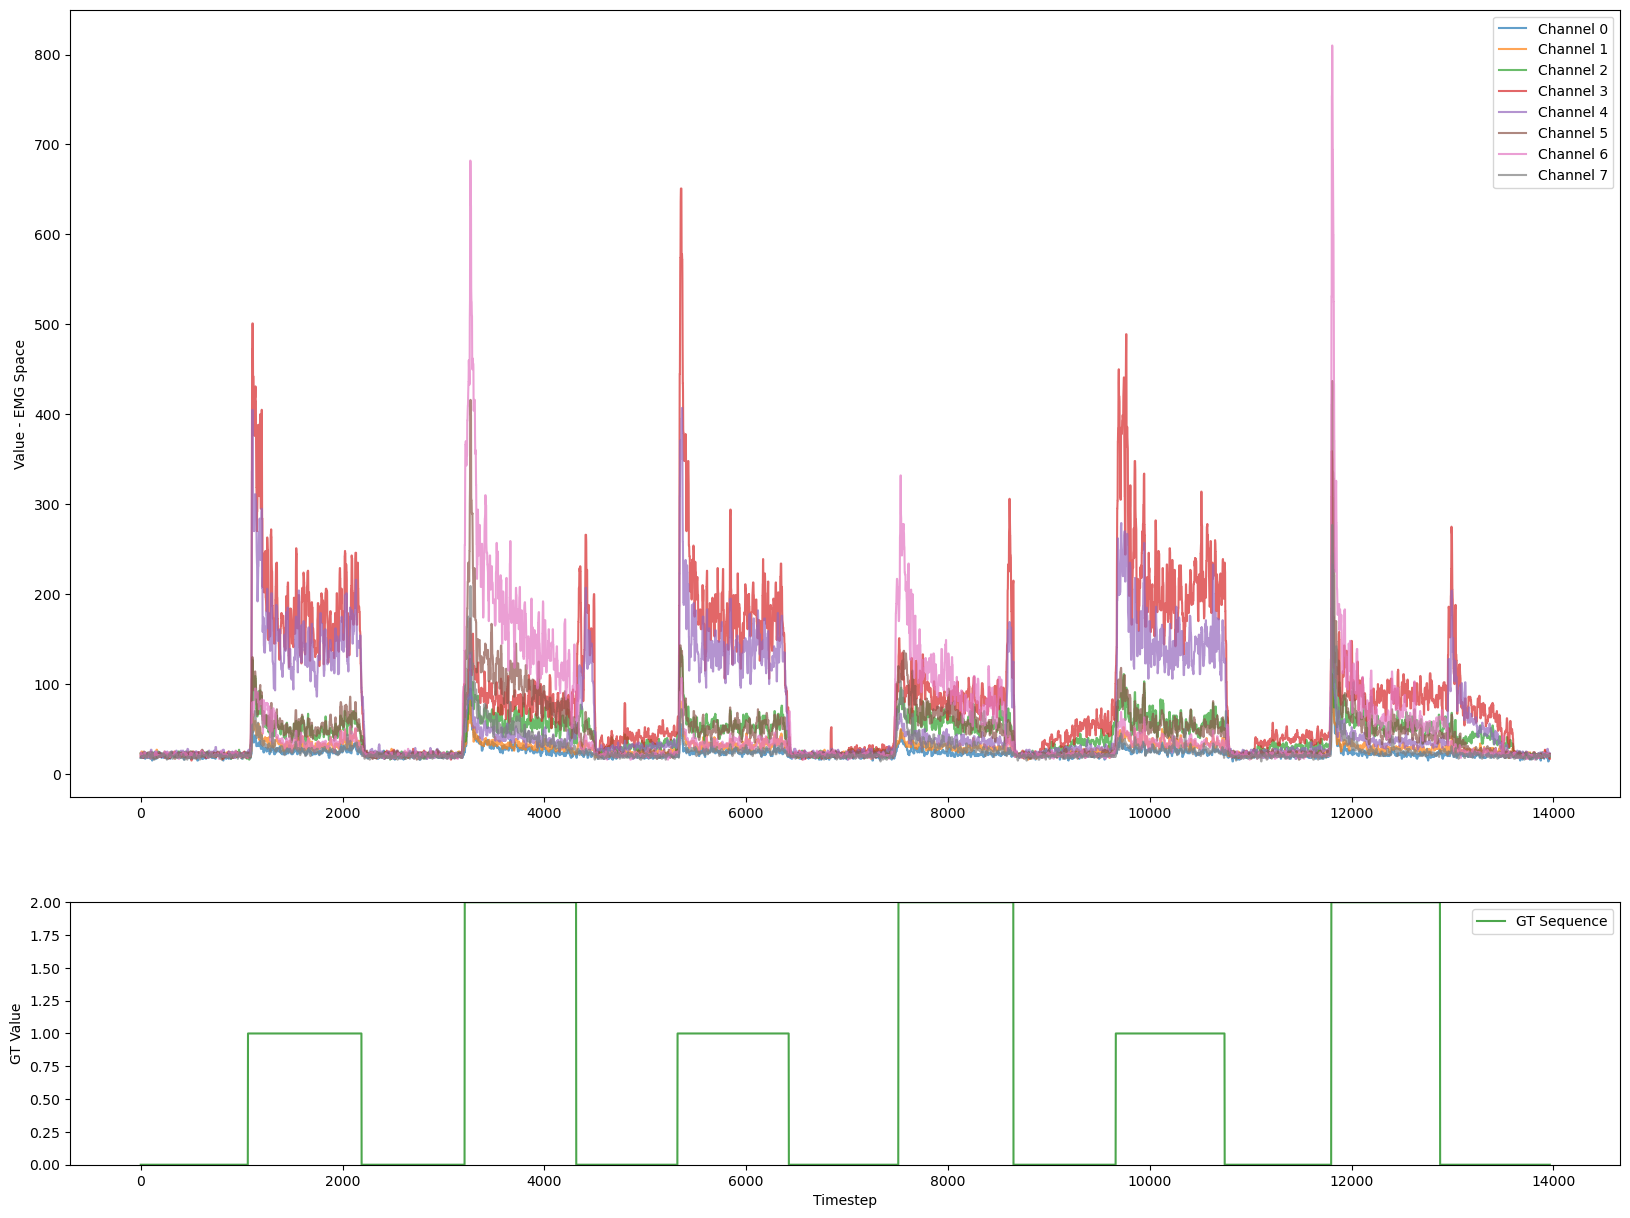

In [5]:
visualize_emgs(path)

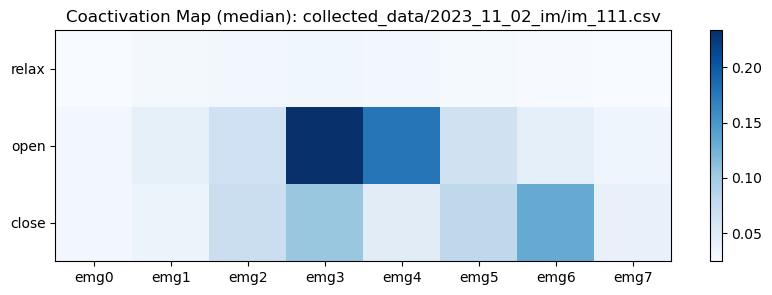

In [6]:
plot_coactivation_map(cm, title=path)

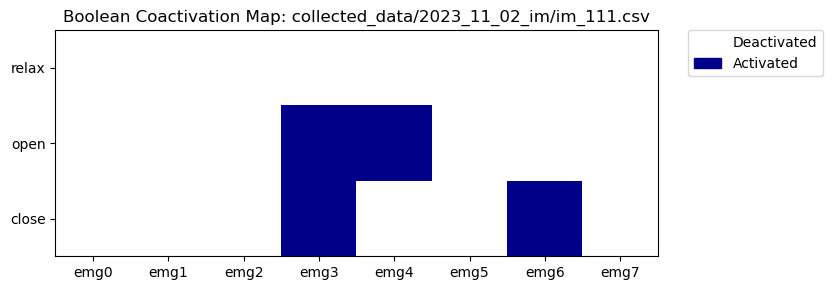

In [7]:
bm1 = get_coactivation_bool_map(cm)
plot_bool_map(bm1, title=path)

In [8]:
cm/np.max(cm)

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.105820,0.121693,0.132275,0.137566,0.126984,0.116402,0.111111,0.105820
1,0.132275,0.179894,0.285714,1.000000,0.756614,0.283069,0.185185,0.142857
2,0.126984,0.158730,0.301587,0.455026,0.206349,0.349206,0.566138,0.169312


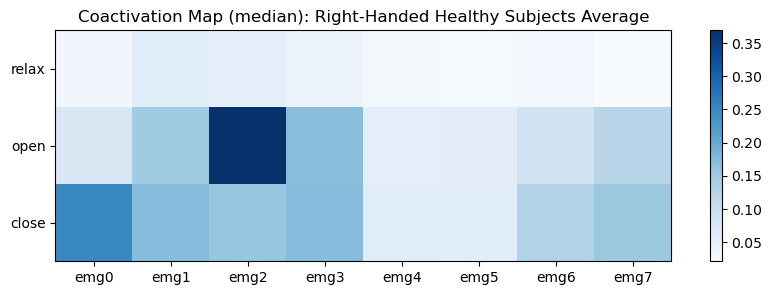

In [21]:
plot_coactivation_map(healthycm, title='Right-Handed Healthy Subjects Average')

In [10]:
bmhealthy = get_coactivation_bool_map(healthycm)

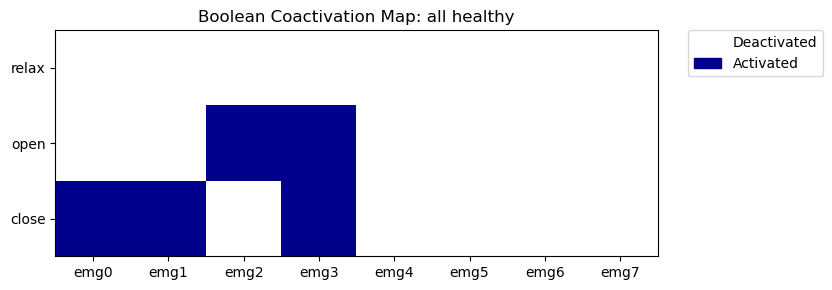

In [11]:
bm2 = get_coactivation_bool_map(healthycm)
plot_bool_map(bm2, title='all healthy')

In [12]:
healthycm/np.max(healthycm)

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.089467,0.157536,0.143688,0.111989,0.075515,0.072053,0.080818,0.057474
1,0.197524,0.402221,1.000000,0.456554,0.150647,0.153575,0.236954,0.332703
2,0.677990,0.465694,0.426536,0.465681,0.164287,0.157193,0.354216,0.412427


In [13]:
healthycm/healthycm.unstack().nlargest(2).iloc[-1]

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.131959,0.232358,0.211932,0.165177,0.111381,0.106275,0.119203,0.084771
1,0.291337,0.593255,1.474947,0.673393,0.222196,0.226515,0.349495,0.490719
2,1.000000,0.686874,0.629118,0.686854,0.242315,0.231851,0.522449,0.608307


In [14]:
bm1

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False
2,False,False,False,True,False,False,True,False


In [15]:
bm2

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False
2,True,True,False,True,False,False,False,False


In [16]:
test = pd.DataFrame(0, index=bm1.index, columns=bm1.columns) 

conditions = [
    (bm1 == 0) & (bm2 == 0),  # both exhibit no activations
    (bm1 == 1) & (bm2 == 1),  # both exhibit an activation
    (bm1 == 0) & (bm2 == 1),  # bm2 exhibits an activation but bm1 does not
    (bm1 == 1) & (bm2 == 0)   # bm2 doesn't exhibit an activation but bm1 does
]
choices = [0, 1, 2, 3]
test[:] = np.select(conditions, choices, default=np.nan)

In [17]:
test

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0,0,0,0,0,0,0,0
1,0,0,2,1,3,0,0,0
2,2,2,0,1,0,0,3,0


In [18]:
get_alignment_map(bm1, bm2)

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0,0,0,0,0,0,0,0
1,0,0,2,1,3,0,0,0
2,2,2,0,1,0,0,3,0


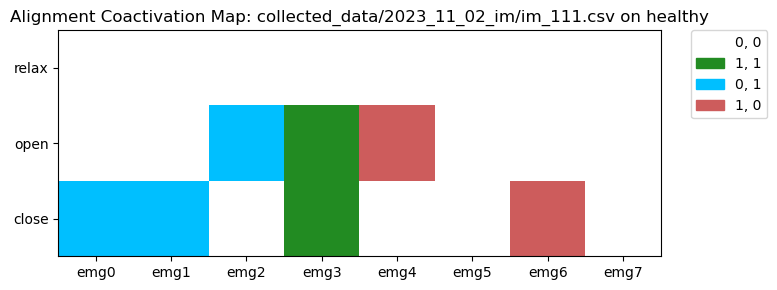

In [19]:
plot_alignment_map(get_alignment_map(bm1, bm2), title1 = path, title2 = 'healthy')